In [1]:
import numpy
import pandas
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, zero_one_loss, hinge_loss, accuracy_score, log_loss
import matplotlib.pyplot as pyplot
import seaborn

In [2]:
def plot_decision_plane(svc_model, ax, x, y, **params):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    h = (x_max - x_min + y_max - y_min) / 1000
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
    z = svc_model.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return ax.contourf(xx, yy, z, **params)

In [3]:
def print_stat(Y_test, prediction, decision, prediction_prob):
    print("Accuracy: ", "{0:0.2f}".format(accuracy_score(Y_test, prediction)))

    print("Precision: ", end = "")
    for i in precision_score(Y_test, prediction, average=None):
        print("{0:0.2f}".format(i), end = ", ")

    print()
    print("Recall: ", end = "")
    for i in recall_score(Y_test, prediction, average=None):
        print("{0:0.2f}".format(i), end = ", ")

    print()
    print("F1: ", end = "")
    for i in f1_score(Y_test, prediction, average=None):
        print("{0:0.2f}".format(i), end = ", ")

    print()

    print("Zero one loss: ", "{0:0.2f}".format(zero_one_loss(Y_test, prediction)))
    print("Hinge loss: ", "{0:0.2f}".format(hinge_loss(Y_test, decision)))
    print("Log loss: ", "{0:0.2f}".format(log_loss(Y_test, prediction_prob)))

<AxesSubplot:xlabel='V1', ylabel='V2'>

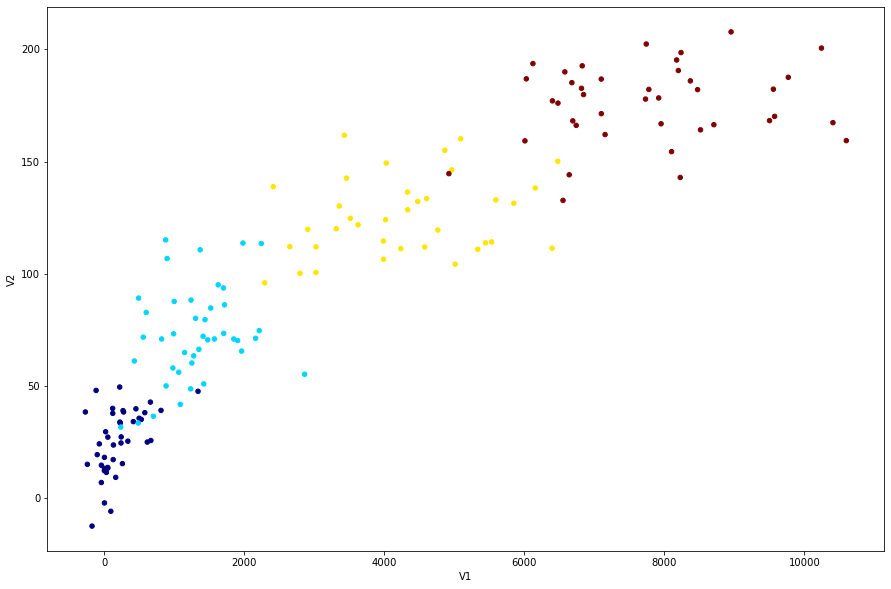

In [4]:
pyplot.rcParams["figure.figsize"] = [15, 10]

dataFrame = pandas.read_excel("Колесников_Д.xlsx", index_col=0)
color_map = pyplot.get_cmap("jet")
col = [color_map(i) for i in numpy.linspace(0, 1, 4)]
dataFrame.plot("V1", "V2", kind="scatter", c=[col[y] for y in dataFrame["class"]])

In [5]:
display(dataFrame.describe())

,V0,V1,V2,V3,V4,V5,class
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,49.570000,3298.639000,97.977500,6537.006188,146.906875,10226.281188,1.462500
std,31.446674,3104.323561,59.648209,6304.852789,89.132434,9579.804540,1.132079
min,-17.800000,-273.020000,-12.300000,-202.100000,-6.100000,-373.320000,0.000000
25%,22.475000,546.960000,40.050000,1076.010000,64.450000,1492.890000,0.000000
50%,49.350000,2068.930000,98.100000,4288.580000,143.800000,6307.040000,1.000000
75%,79.475000,6050.585000,149.500000,10568.775000,221.400000,17676.090000,2.250000
max,107.600000,10598.580000,207.700000,22364.700000,306.800000,31262.920000,3.000000


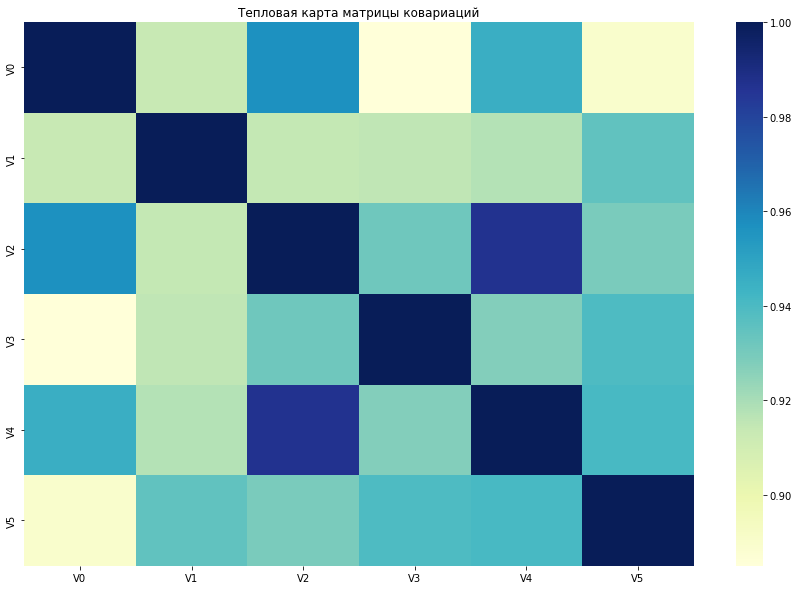

In [6]:
dataFrame_features = dataFrame.drop("class", axis=1)
dataFrame_corr = dataFrame_features.corr()
seaborn.heatmap(dataFrame_corr, cmap="YlGnBu")
pyplot.title("Тепловая карта матрицы ковариаций")
pyplot.show()

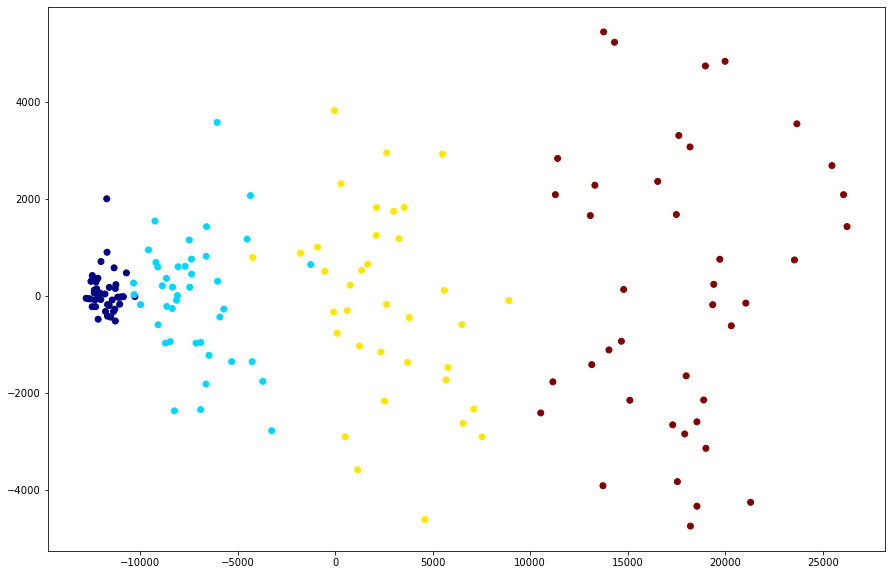

In [7]:
X = numpy.asarray(dataFrame.drop(["class"], axis=1))
Y = numpy.asarray(dataFrame["class"])
pca = PCA(n_components=2)
X = pca.fit_transform(X)

color_map = pyplot.get_cmap("jet")
colors = [color_map(i) for i in numpy.linspace(0, 1, 4)]
pyplot.scatter(X[:,0], X[:,1], c=[colors[y] for y in Y])
pyplot.show()

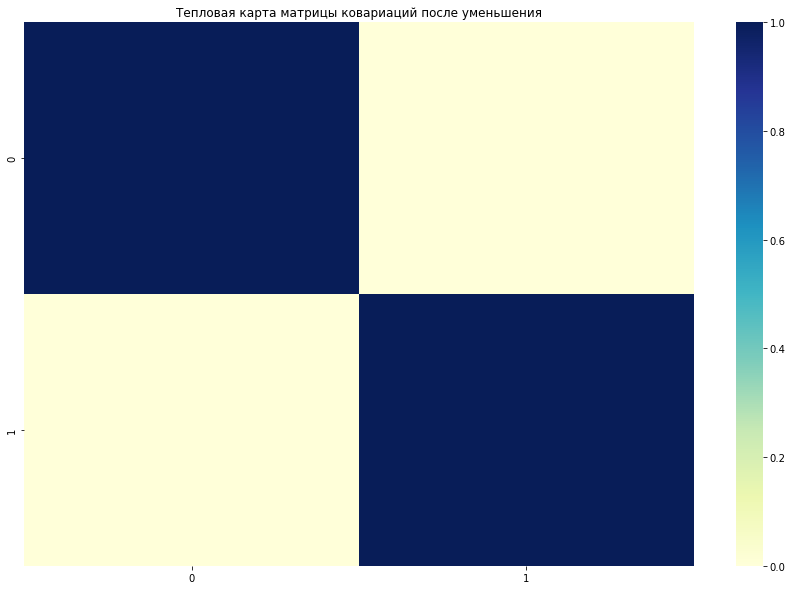

In [8]:
X_corr = pandas.DataFrame(X).corr()
seaborn.heatmap(X_corr, cmap="YlGnBu")
pyplot.title("Тепловая карта матрицы ковариаций после уменьшения")
pyplot.show()

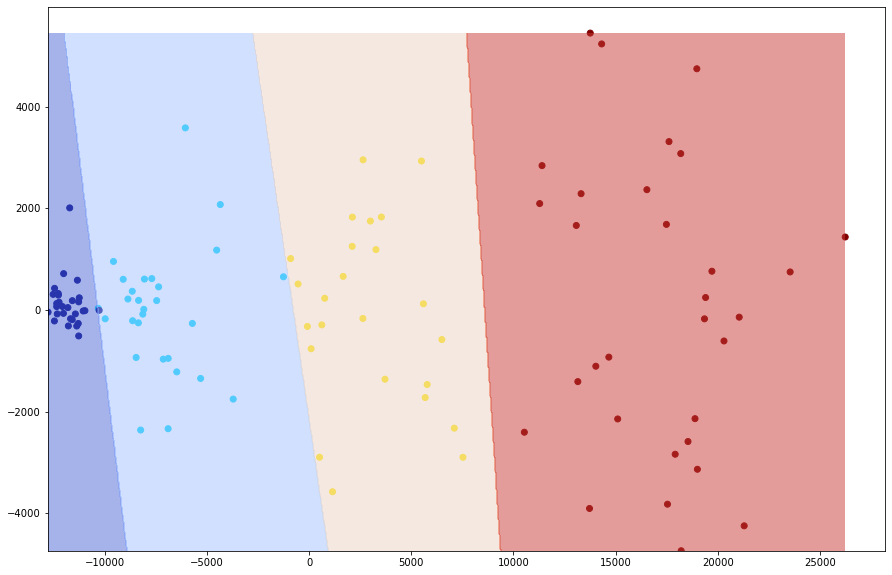

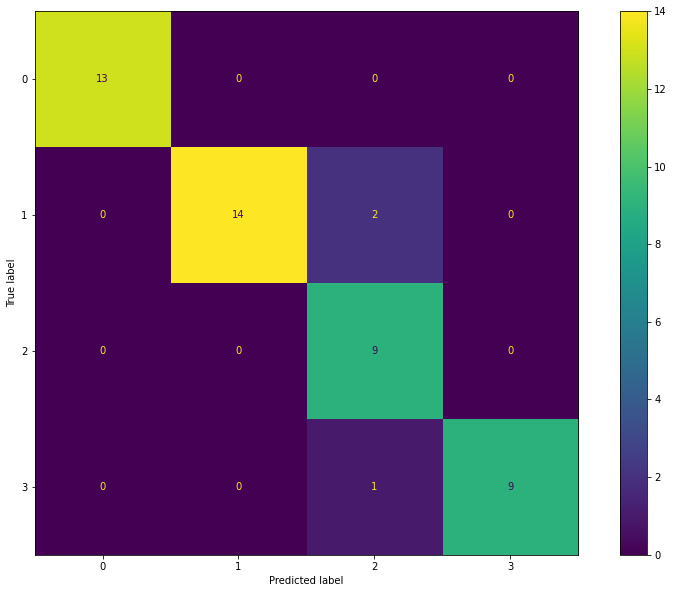

Accuracy:  0.94
Precision: 1.00, 0.88, 1.00, 0.90, 
Recall: 1.00, 1.00, 0.75, 1.00, 
F1: 1.00, 0.93, 0.86, 0.95, 
Zero one loss:  0.06
Hinge loss:  0.15
Log loss:  0.19


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="linear", C=1.0, probability=True)
model.fit(X_train, Y_train)

pyplot.scatter(X_train[:,0], X_train[:,1], c=[colors[y] for y in Y_train])
ax = pyplot.gca()
plot_decision_plane(model, ax, X[:,0], X[:,1], cmap=pyplot.cm.coolwarm, alpha=0.5)
pyplot.show()


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)

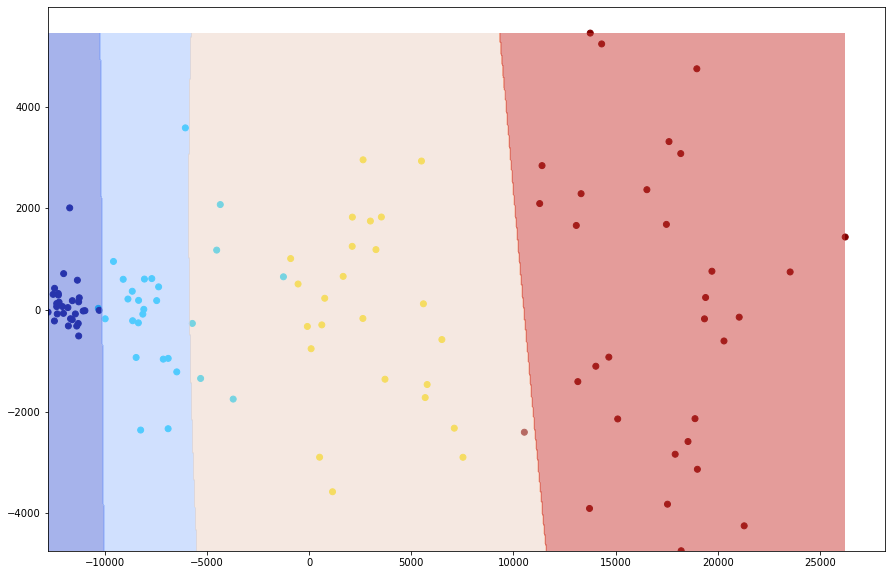

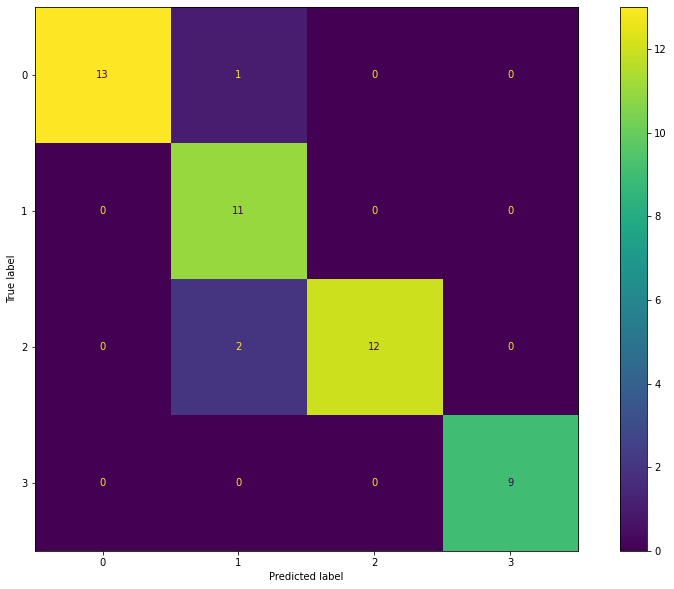

Accuracy:  0.94
Precision: 0.93, 1.00, 0.86, 1.00, 
Recall: 1.00, 0.79, 1.00, 1.00, 
F1: 0.96, 0.88, 0.92, 1.00, 
Zero one loss:  0.06
Hinge loss:  0.13
Log loss:  0.25


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="poly", C=1.0, probability=True)
model.fit(X_train, Y_train)

pyplot.scatter(X_train[:,0], X_train[:,1], c=[colors[y] for y in Y_train])
ax = pyplot.gca()
plot_decision_plane(model, ax, X[:,0], X[:,1], cmap=pyplot.cm.coolwarm, alpha=0.5)
pyplot.show()


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)

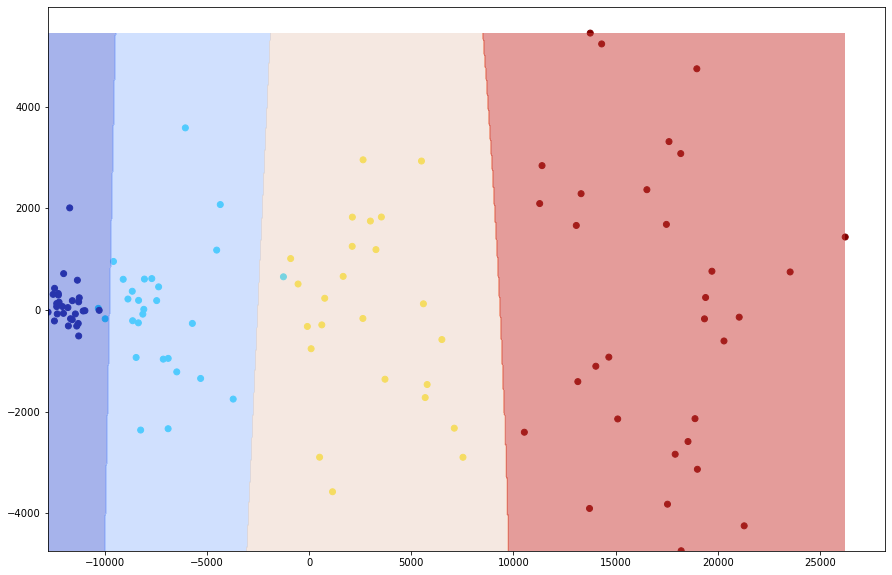

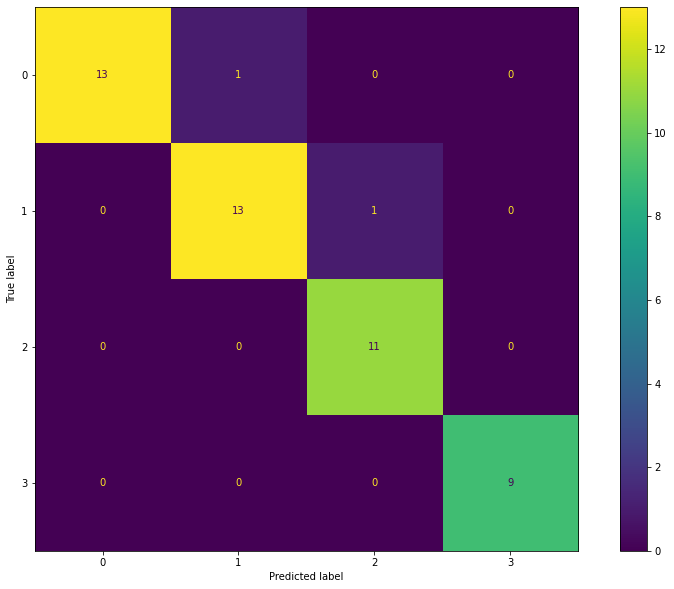

Accuracy:  0.96
Precision: 0.93, 0.93, 1.00, 1.00, 
Recall: 1.00, 0.93, 0.92, 1.00, 
F1: 0.96, 0.93, 0.96, 1.00, 
Zero one loss:  0.04
Hinge loss:  0.09
Log loss:  0.20


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="rbf", C=1.0, probability=True)
model.fit(X_train, Y_train)

pyplot.scatter(X_train[:,0], X_train[:,1], c=[colors[y] for y in Y_train])
ax = pyplot.gca()
plot_decision_plane(model, ax, X[:,0], X[:,1], cmap=pyplot.cm.coolwarm, alpha=0.5)
pyplot.show()


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)

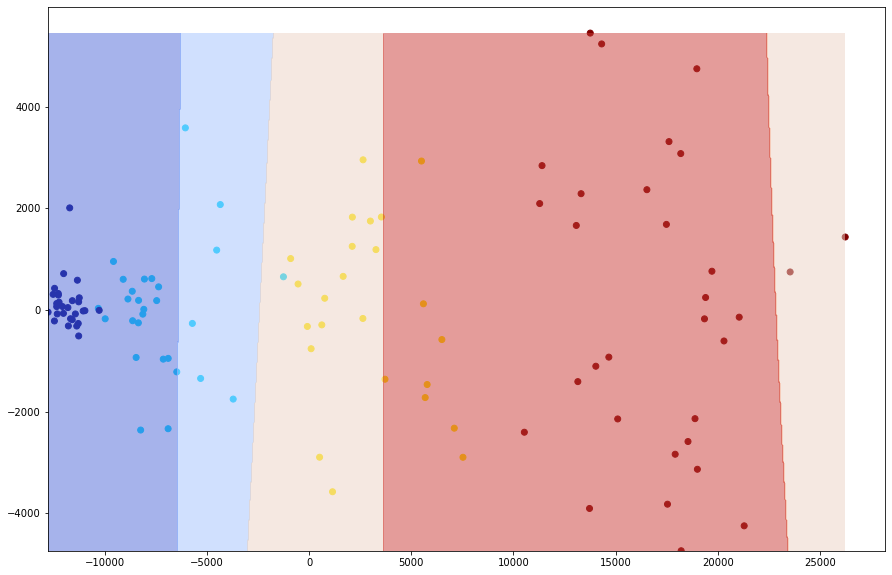

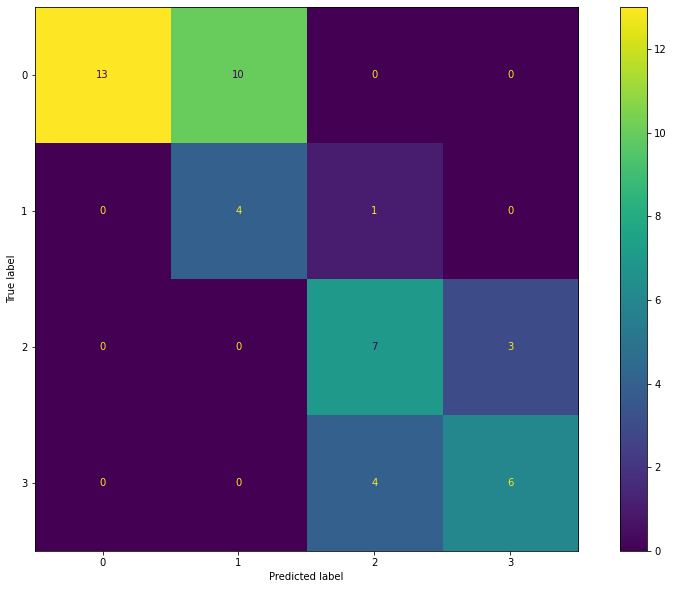

Accuracy:  0.62
Precision: 0.57, 0.80, 0.70, 0.60, 
Recall: 1.00, 0.29, 0.58, 0.67, 
F1: 0.72, 0.42, 0.64, 0.63, 
Zero one loss:  0.38
Hinge loss:  0.75
Log loss:  0.49


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="sigmoid", C=1.0, probability=True)
model.fit(X_train, Y_train)

pyplot.scatter(X_train[:,0], X_train[:,1], c=[colors[y] for y in Y_train])
ax = pyplot.gca()
plot_decision_plane(model, ax, X[:,0], X[:,1], cmap=pyplot.cm.coolwarm, alpha=0.5)
pyplot.show()


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)

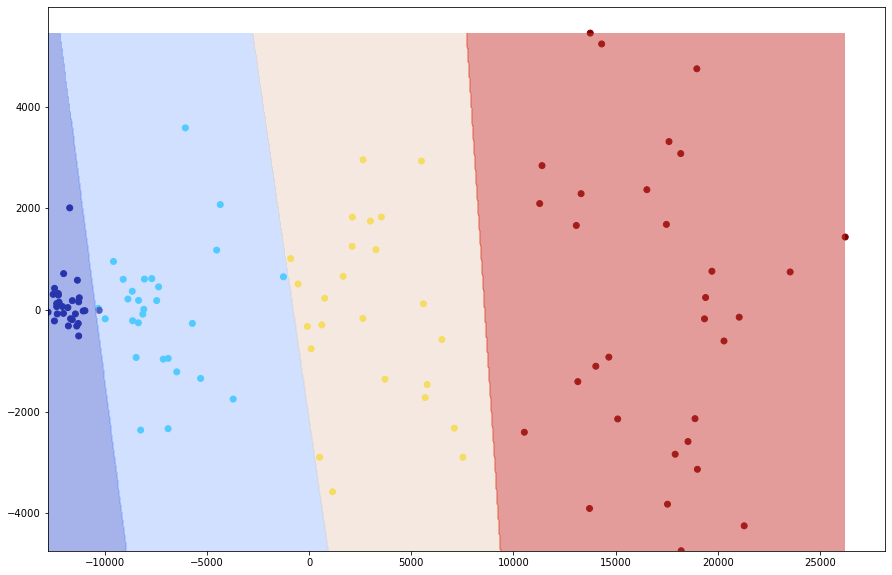

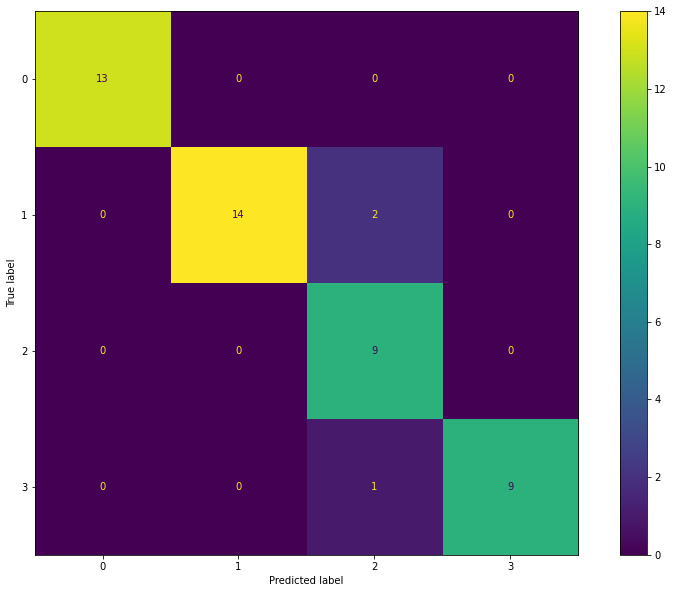

Accuracy:  0.94
Precision: 1.00, 0.88, 1.00, 0.90, 
Recall: 1.00, 1.00, 0.75, 1.00, 
F1: 1.00, 0.93, 0.86, 0.95, 
Zero one loss:  0.06
Hinge loss:  0.15
Log loss:  0.20


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="linear", C=0.1, probability=True)
model.fit(X_train, Y_train)

pyplot.scatter(X_train[:,0], X_train[:,1], c=[colors[y] for y in Y_train])
ax = pyplot.gca()
plot_decision_plane(model, ax, X[:,0], X[:,1], cmap=pyplot.cm.coolwarm, alpha=0.5)
pyplot.show()


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)

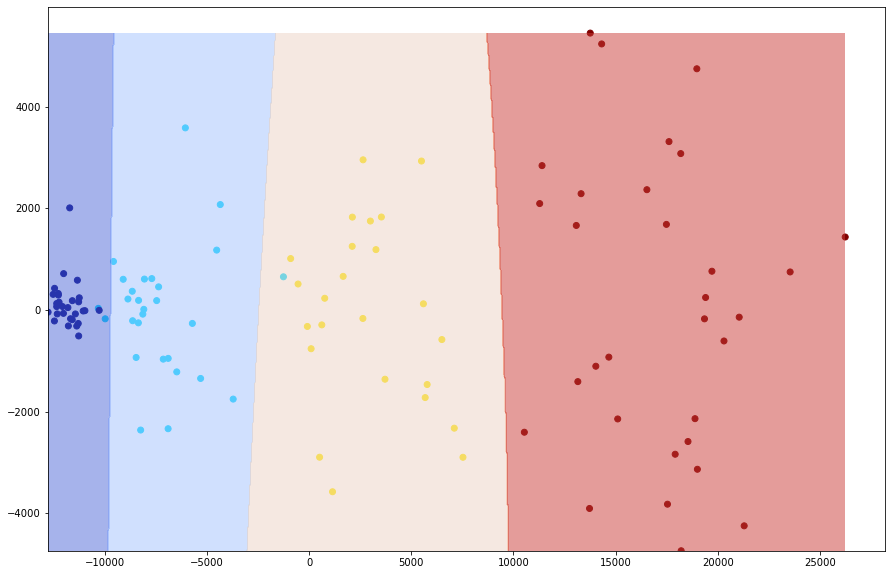

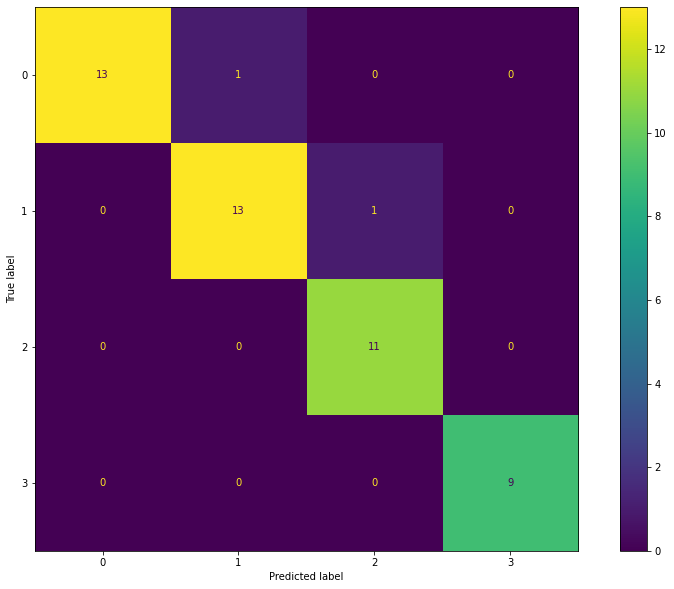

Accuracy:  0.96
Precision: 0.93, 0.93, 1.00, 1.00, 
Recall: 1.00, 0.93, 0.92, 1.00, 
F1: 0.96, 0.93, 0.96, 1.00, 
Zero one loss:  0.04
Hinge loss:  0.09
Log loss:  0.20


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="rbf", C=0.7, probability=True)
model.fit(X_train, Y_train)

pyplot.scatter(X_train[:,0], X_train[:,1], c=[colors[y] for y in Y_train])
ax = pyplot.gca()
plot_decision_plane(model, ax, X[:,0], X[:,1], cmap=pyplot.cm.coolwarm, alpha=0.5)
pyplot.show()


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)

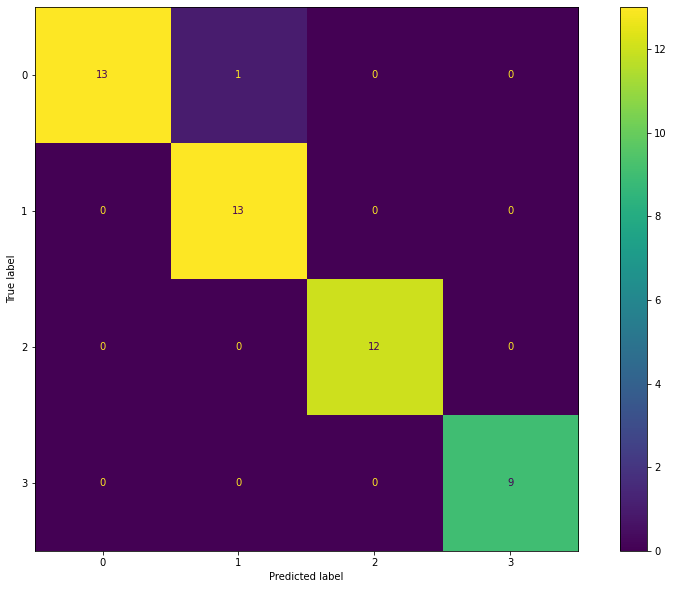

Accuracy:  0.98
Precision: 0.93, 1.00, 1.00, 1.00, 
Recall: 1.00, 0.93, 1.00, 1.00, 
F1: 0.96, 0.96, 1.00, 1.00, 
Zero one loss:  0.02
Hinge loss:  0.06
Log loss:  0.16


In [18]:
X = numpy.asarray(dataFrame.drop(["class"], axis=1))
Y = numpy.asarray(dataFrame["class"])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8080)
model = svm.SVC(kernel="linear", C=1.0, probability=True)
model.fit(X_train, Y_train)


prediction_prob = model.predict_proba(X_test)
decision = model.decision_function(X_test)
prediction = model.predict(X_test)
confusion_matr = (confusion_matrix(prediction, Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matr)
disp.plot()
pyplot.show()

print_stat(Y_test, prediction, decision, prediction_prob)